In [ ]:
# Amazon Produc

# Data Preprocessing

In [2]:
import json
import pandas as pd    

# json_file = "KindleStoreReviews.json"
json_file = "../HomeKitchenReviews.json"
df = pd.read_json(json_file,lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"


In [3]:
df_copy = df.copy()

In [4]:
df['helpful_1'] = [l[0] for l in df['helpful']]
df['helpful_2'] = [l[1] for l in df['helpful']]
df['helpfulness'] = df['helpful_1']/df['helpful_2']

df = df[df['helpfulness'].notna()]

df['helpful_category'] = df['helpfulness'].map(lambda x: 1 if x>=0.5 else 0)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_1,helpful_2,helpfulness,helpful_category
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013",26,27,0.962963,1
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011",14,18,0.777778,1
6,A1SW2D234X11MS,0615391206,"savinggrace ""savinggrace""","[2, 3]",This book is so beautifully illustrated and ea...,5,Beautifully illustrated recipe and instruction...,1341187200,"07 2, 2012",2,3,0.666667,1
7,A1ZH5ULI4SBO48,0615391206,"S. G. ""s.g.""","[32, 39]",I bought this when I bought the pop maker. I t...,2,Okay but you can figure it out yourself withou...,1323302400,"12 8, 2011",32,39,0.820513,1
8,A1V13XAWO98C1J,0615391206,"Stan ""Stan""","[13, 13]","The Zoku accessories are pricey, but the recip...",5,"If you have the Zoku maker, buy this!",1316649600,"09 22, 2011",13,13,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551655,AWFGKB5SCJAO2,B00LB18EKK,allowingplace,"[1, 1]",Super handy little set for the kitchen! I have...,5,GREATER GRATER!!,1405382400,"07 15, 2014",1,1,1.000000,1
551656,A1Q1Z7IR79G52A,B00LB18EKK,"Ann Ingersoll Madison Rain ""Ann""","[1, 1]",Great grater for all kinds of cheese! Parmesan...,5,Love this grater and apple slicer! Works so we...,1405296000,"07 14, 2014",1,1,1.000000,1
551657,A2FU5LRHY17OY2,B00LB18EKK,CanHave,"[1, 1]",Absolutely love this grater. If cheese could b...,5,If cheese could be crisp,1405036800,"07 11, 2014",1,1,1.000000,1
551669,A1KQNP8MOJDJKC,B00LB18EKK,RS,"[1, 1]","Love both the products, The apple cutter is su...",5,Love both the products,1405209600,"07 13, 2014",1,1,1.000000,1


In [5]:
df = df.drop(df[df['helpful_category'] == 1].sample(frac=0.86).index)
df.helpful_category.value_counts()


# df = df.drop(df[df['helpful_category'] == 1].sample(frac=0.62).index)
# df.helpful_category.value_counts()

# df[(df['helpful_category'] != 1) | (np.random.rand(len(df)) < 0.86)]
# df.helpful_category.value_counts()


1    30682
0    29475
Name: helpful_category, dtype: int64

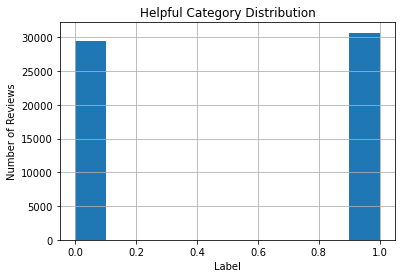

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


df_hist = pd.DataFrame()
df_hist["Helpful Category Distribution"] = df["helpful_category"]

df_hist.hist('Helpful Category Distribution', ax=ax)
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
fig.savefig('helpful_category_distribution.png')



# Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline
seed = 42
import os
os.environ['OMP_NUM_THREADS'] = '4'

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [31]:
vect_word = TfidfVectorizer(max_features=20000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,4),dtype=np.float32)
# vect_char = TfidfVectorizer(max_features=40000, lowercase=True, analyzer='char',
#                         stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [27]:
X = np.array(df["reviewText"])
y = np.array(df["helpful_category"])
print(len(X))
print(len(y))
print(type(X))

136594
136594
<class 'numpy.ndarray'>


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

print("1")
tr_vect = vect_word.fit_transform(X_train)
ts_vect = vect_word.transform(X_test)
print("2")

#     tr_vect_char = vect_char.fit_transform(X_train)
#     ts_vect_char = vect_char.transform(X_test)
#     print("2")

#     X = sparse.hstack([tr_vect, tr_vect_char])
#     x_test = sparse.hstack([ts_vect, ts_vect_char])
X_train = sparse.hstack([tr_vect])
X_test = sparse.hstack([ts_vect])

#     prd = np.zeros((x_test.shape[0],y_train.shape[1]))

lr = LogisticRegression(C=2,random_state = 42,class_weight = 'balanced')
lr.fit(X_train,y_train)
pred =  lr.predict(X_test)
score = lr.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
#     print('\nConfusion matrix\n',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
plt.savefig("confusion_matrix.png")

# Classification Output

In [13]:
y_hats  = pd.DataFrame(pred).reset_index()
y_test_copy = pd.DataFrame(y_test_copy).reset_index()
X_test_copy = pd.DataFrame(X_test_copy).reset_index()

df_results = pd.DataFrame()
df_results["Prediction"] = y_hats[0]
df_results["Actual"] = y_test_copy[0]
df_results["Text"] = X_test_copy[0]
df_results.head()
df_results.to_csv("df_results.csv")

In [14]:
df_results_helpful = df_results.loc[(df_results['Actual'] == 1) & (df_results['Prediction'] == 1)]
df_results_helpful

,Prediction,Actual,Text
0,1,1,We bought these a few years back. The rubber ...
1,1,1,"This is expensive. But in my book, anything th..."
4,1,1,The width dimension of this organizer is liste...
5,1,1,I have had this vacuum cleaner for about three...
11,1,1,Disappointing. I bought this for a simple tas...
...,...,...,...
19838,1,1,I couldn't find a silve rod in the local store...
19843,1,1,I love this type sifter. My hands are very we...
19844,1,1,The British have known about these electric ke...
19849,1,1,"When running at full power, his clears even st..."


In [15]:
df_results_unhelpful = df_results.loc[(df_results['Actual'] == 0) & (df_results['Prediction'] == 0)]
df_results_unhelpful

,Prediction,Actual,Text
2,0,0,Found this roaster online on a coupon site tha...
6,0,0,"I have hesitated to review this item, thinking..."
7,0,0,"When I purchased this product, the lady at the..."
8,0,0,"This knife block is pretty large, way bigger t..."
12,0,0,great for picking up pet hair the only downsid...
...,...,...,...
19841,0,0,I recently purchased two packs of this TV Tray...
19842,0,0,I have to agree with all the negative comments...
19847,0,0,"I wanted a simple, sturdy tv stand and that's ..."
19848,0,0,Work as advertised. By the time I've used 100 ...


In [39]:
df_results_predicted_helpful = df_results.loc[((df_results['Actual'] == 0) & (df_results['Prediction'] == 1))]
df_results_predicted_helpful


,Prediction,Actual,Text
3,1,0,There is nothing like a good neck pillow for l...
9,1,0,I ordered this to compliment an existing can i...
10,1,0,I really like this colander. It's easy to clea...
13,1,0,Bought this for outdoor movie night and it was...
18,1,0,Liked everything about it except one VERY impo...
...,...,...,...
19819,1,0,"Well designed, intuitive to use, and easy to r..."
19820,1,0,"I love the design, it's pretty sexy.Getting a ..."
19830,1,0,I thought it would be good to have so many siz...
19845,1,0,I have had this for a month or more. I like t...


In [40]:
df_results_predicted_unhelpful = df_results.loc[((df_results['Actual'] == 1) & (df_results['Prediction'] == 0))]
df_results_predicted_unhelpful

,Prediction,Actual,Text
14,0,1,I bought this as a gift for a friend. She was...
15,0,1,We are loving this cooking set. Took the advic...
19,0,1,We love this pail. We were using coffee cans f...
21,0,1,I have had this bread machine for one year. A...
27,0,1,I wanted to move away from plastic to wooden h...
...,...,...,...
19807,0,1,I use this ice cream maker quite often. Rock ...
19816,0,1,This was one of the best purchases I've ever m...
19817,0,1,My husband and I love these trays. We use the...
19818,0,1,I ordered these sheets for my 7 year old boys ...


# Sentiment Analysis

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/evekazarian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#initialize vader module
sid = SentimentIntensityAnalyzer()
# splits text into sentences/words
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [31]:
# print sentiment distribution for entire snippet collection 
def sentimentDistributionCalc(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
                print("POSITIVE:", snippet)
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1      
                print("NEGATIVE:", snippet)

    
    total = posNum+negNum+neuNum

    print("Percentage positive:", (posNum/total)*100)
    print("Percentage negative:", (negNum/total)*100)
    print("Percentage neutral:", (neuNum/total)*100)
    if(negNum!=0 and posNum!=0):
        print("positive:negative ratio", posNum/negNum)

In [32]:
# print sentiment distribution for entire snippet collection 
def makePie(tokenizedSnippets):
    posNum = 0
    negNum = 0
    neuNum = 0 
    for snippet in tokenizedSnippets:
        scores = sid.polarity_scores(snippet)
        
        for key in sorted(scores):
            if (scores['pos']>scores['neg'] and scores['pos']>scores['neu']):
                posNum += 1
            elif (scores['neu']>scores['neg'] and scores['neu']>scores['pos']):
                neuNum += 1
            elif (scores['neg']>scores['neu'] and scores['neg']>scores['pos']):
                negNum += 1
    
    df = pd.DataFrame(
        {'sentiment': ['Positive', 'Negative', 'Neutral'],
       'count': [posNum, negNum, neuNum]},
        index=['Positive', 'Negative','Neutral']
        )
    
    plot = df.plot.pie(y='count', figsize=(6, 6))
    
    if(negNum!=0 and posNum!=0):
        df2 = pd.DataFrame(
            {'sentiment': ['Positive', 'Negative'],
           'count': [posNum, negNum]}, 
            index=['Positive', 'Negative']
            )

        plot = df2.plot.pie(y='count', figsize=(4, 4))

## Sentiment in CORRECTLY Classified HELPFUL reviews

positive:negative ratio 5.797250859106529

In [33]:
helpfulSnippets = []
for e in df_results_helpful[df_results_helpful.columns[2]]: 
    helpfulSnippets.append(e)
helpfulSnippetsTokenized = tokenizer.tokenize(''.join(helpfulSnippets))
sentimentDistributionCalc(helpfulSnippetsTokenized)


POSITIVE: I'd LOVE that job!Decent cap that seals well.
POSITIVE: I'd LOVE that job!Decent cap that seals well.
POSITIVE: I'd LOVE that job!Decent cap that seals well.
POSITIVE: I'd LOVE that job!Decent cap that seals well.
NEGATIVE: I am shocked by any bad reviews.
NEGATIVE: I am shocked by any bad reviews.
NEGATIVE: I am shocked by any bad reviews.
NEGATIVE: I am shocked by any bad reviews.
NEGATIVE: No problem there.My criticisms are two-fold.
NEGATIVE: No problem there.My criticisms are two-fold.
NEGATIVE: No problem there.My criticisms are two-fold.
NEGATIVE: No problem there.My criticisms are two-fold.
POSITIVE: It dries pretty fast, and looks pretty nice.
POSITIVE: It dries pretty fast, and looks pretty nice.
POSITIVE: It dries pretty fast, and looks pretty nice.
POSITIVE: It dries pretty fast, and looks pretty nice.
POSITIVE: The one fan works great .
POSITIVE: The one fan works great .
POSITIVE: The one fan works great .
POSITIVE: The one fan works great .
POSITIVE: OK?
POSITI

POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
NEGATIVE: Problem solved.
NEGATIVE: Problem solved.
NEGATIVE: Problem solved.
NEGATIVE: Problem solved.
POSITIVE: Diamond abrasive wheels sharpen simultaneously creating a superior, burr-free edge quickly and easily.
POSITIVE: Diamond abrasive wheels sharpen simultaneously creating a superior, burr-free edge quickly and easily.
POSITIVE: Diamond abrasive wheels sharpen simultaneously creating a superior, burr-free edge quickly and easily.
POSITIVE: Diamond abrasive wheels sharpen simultaneously creating a superior, burr-free edge quickly and easily.
NEGATIVE: No problem.
NEGATIVE: No problem.
NEGATIVE: No problem.
NEGATIVE: No problem.
POSITIVE: It's easy to remove, wash, and reinstall.Bottom line: it's a great value overall.
POSITIVE: It's easy to remove, wash, and reinstall.Bottom line: it's a great value overall.
POSITIVE: It's easy to remove, wash, and reinstall.Bottom line: it's a great value overall.
POSI

POSITIVE: Thank goodness for Amazon's wonderful return policy.
POSITIVE: Thank goodness for Amazon's wonderful return policy.
POSITIVE: Thank goodness for Amazon's wonderful return policy.
POSITIVE: Thank goodness for Amazon's wonderful return policy.
POSITIVE: I'm glad I didn't wait!
POSITIVE: I'm glad I didn't wait!
POSITIVE: I'm glad I didn't wait!
POSITIVE: I'm glad I didn't wait!
POSITIVE: Good luck and happy taco making!
POSITIVE: Good luck and happy taco making!
POSITIVE: Good luck and happy taco making!
POSITIVE: Good luck and happy taco making!
POSITIVE: Did I mention, it's adorable?
POSITIVE: Did I mention, it's adorable?
POSITIVE: Did I mention, it's adorable?
POSITIVE: Did I mention, it's adorable?
POSITIVE: This works like a charm.
POSITIVE: This works like a charm.
POSITIVE: This works like a charm.
POSITIVE: This works like a charm.
POSITIVE: It's just excellent.
POSITIVE: It's just excellent.
POSITIVE: It's just excellent.
POSITIVE: It's just excellent.
NEGATIVE: No wat

POSITIVE: Good quality and highly recommended.This little jewel is unbelievable.
POSITIVE: Good quality and highly recommended.This little jewel is unbelievable.
POSITIVE: Good quality and highly recommended.This little jewel is unbelievable.
POSITIVE: Good quality and highly recommended.This little jewel is unbelievable.
POSITIVE: Perfect product.
POSITIVE: Perfect product.
POSITIVE: Perfect product.
POSITIVE: Perfect product.
NEGATIVE: Our fault I guess.
NEGATIVE: Our fault I guess.
NEGATIVE: Our fault I guess.
NEGATIVE: Our fault I guess.
POSITIVE: Make sure the milk is warm.
POSITIVE: Make sure the milk is warm.
POSITIVE: Make sure the milk is warm.
POSITIVE: Make sure the milk is warm.
POSITIVE: I love um!!
POSITIVE: I love um!!
POSITIVE: I love um!!
POSITIVE: I love um!!
POSITIVE: - More like a nicer looking mop.
POSITIVE: - More like a nicer looking mop.
POSITIVE: - More like a nicer looking mop.
POSITIVE: - More like a nicer looking mop.
POSITIVE: I was surprised to find it ver

POSITIVE: Disappointed.I find this pan very useful, cleans up pretty easily.
POSITIVE: Disappointed.I find this pan very useful, cleans up pretty easily.
POSITIVE: Disappointed.I find this pan very useful, cleans up pretty easily.
POSITIVE: Disappointed.I find this pan very useful, cleans up pretty easily.
POSITIVE: )I love this heater.
POSITIVE: )I love this heater.
POSITIVE: )I love this heater.
POSITIVE: )I love this heater.
POSITIVE: It's a pretty powerful dustbuster on a stick.
POSITIVE: It's a pretty powerful dustbuster on a stick.
POSITIVE: It's a pretty powerful dustbuster on a stick.
POSITIVE: It's a pretty powerful dustbuster on a stick.
POSITIVE: Good value at this price!
POSITIVE: Good value at this price!
POSITIVE: Good value at this price!
POSITIVE: Good value at this price!
NEGATIVE: Now I have no smell and no odd taste.
NEGATIVE: Now I have no smell and no odd taste.
NEGATIVE: Now I have no smell and no odd taste.
NEGATIVE: Now I have no smell and no odd taste.
POSITIVE

POSITIVE: Reasonably easy to cut.
POSITIVE: Reasonably easy to cut.
POSITIVE: Reasonably easy to cut.
POSITIVE: Reasonably easy to cut.
POSITIVE: I am so glad I did.
POSITIVE: I am so glad I did.
POSITIVE: I am so glad I did.
POSITIVE: I am so glad I did.
POSITIVE: Linked together, this is a superb buffet warmer -- a warmer pot.
POSITIVE: Linked together, this is a superb buffet warmer -- a warmer pot.
POSITIVE: Linked together, this is a superb buffet warmer -- a warmer pot.
POSITIVE: Linked together, this is a superb buffet warmer -- a warmer pot.
POSITIVE: They work great and were a great price!
POSITIVE: They work great and were a great price!
POSITIVE: They work great and were a great price!
POSITIVE: They work great and were a great price!
POSITIVE: It's solid.
POSITIVE: It's solid.
POSITIVE: It's solid.
POSITIVE: It's solid.
POSITIVE: I'm totally in love with these cute little containers!
POSITIVE: I'm totally in love with these cute little containers!
POSITIVE: I'm totally in l

POSITIVE: Yes!
POSITIVE: Yes!
POSITIVE: Yes!
POSITIVE: Yes!
POSITIVE: Okay, me.
POSITIVE: Okay, me.
POSITIVE: Okay, me.
POSITIVE: Okay, me.
POSITIVE: Thanks to Amazon's free returns policy, I went ahead and took a chance.
POSITIVE: Thanks to Amazon's free returns policy, I went ahead and took a chance.
POSITIVE: Thanks to Amazon's free returns policy, I went ahead and took a chance.
POSITIVE: Thanks to Amazon's free returns policy, I went ahead and took a chance.
POSITIVE: These hangers are the best.
POSITIVE: These hangers are the best.
POSITIVE: These hangers are the best.
POSITIVE: These hangers are the best.
POSITIVE: I would recommend.I like a strong cup of coffee.
POSITIVE: I would recommend.I like a strong cup of coffee.
POSITIVE: I would recommend.I like a strong cup of coffee.
POSITIVE: I would recommend.I like a strong cup of coffee.
POSITIVE: It wips em up great.
POSITIVE: It wips em up great.
POSITIVE: It wips em up great.
POSITIVE: It wips em up great.
POSITIVE: Love this 

POSITIVE: It fits perfectly.
POSITIVE: It fits perfectly.
POSITIVE: It fits perfectly.
POSITIVE: It fits perfectly.
POSITIVE: The controls are great and easy to use.
POSITIVE: The controls are great and easy to use.
POSITIVE: The controls are great and easy to use.
POSITIVE: The controls are great and easy to use.
POSITIVE: I like this better.
POSITIVE: I like this better.
POSITIVE: I like this better.
POSITIVE: I like this better.
NEGATIVE: I was terribly disappointed!
NEGATIVE: I was terribly disappointed!
NEGATIVE: I was terribly disappointed!
NEGATIVE: I was terribly disappointed!
POSITIVE: It's great for quesidillas as well.
POSITIVE: It's great for quesidillas as well.
POSITIVE: It's great for quesidillas as well.
POSITIVE: It's great for quesidillas as well.
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: LOL!
NEGATIVE: Sorry!
NEGATIVE: Sorry!
NEGATIVE: Sorry!
NEGATIVE: Sorry!
POSITIVE: It's great.
POSITIVE: It's great.
POSITIVE: It's great.
POSITIVE: It's great.
POSITIVE

POSITIVE: Love, love, love this!
POSITIVE: Love, love, love this!
POSITIVE: Love, love, love this!
POSITIVE: Love, love, love this!
POSITIVE: Cheers!
POSITIVE: Cheers!
POSITIVE: Cheers!
POSITIVE: Cheers!
NEGATIVE: No dripping.
NEGATIVE: No dripping.
NEGATIVE: No dripping.
NEGATIVE: No dripping.
POSITIVE: Found out that teas are great!
POSITIVE: Found out that teas are great!
POSITIVE: Found out that teas are great!
POSITIVE: Found out that teas are great!
POSITIVE: Hope this helps."
POSITIVE: Hope this helps."
POSITIVE: Hope this helps."
POSITIVE: Hope this helps."
POSITIVE: So please allow me to summarize.
POSITIVE: So please allow me to summarize.
POSITIVE: So please allow me to summarize.
POSITIVE: So please allow me to summarize.
POSITIVE: They are dishwasher safe or easy to wash.What's really great?
POSITIVE: They are dishwasher safe or easy to wash.What's really great?
POSITIVE: They are dishwasher safe or easy to wash.What's really great?
POSITIVE: They are dishwasher safe or ea

POSITIVE: The Ninja definitely wins at doing a better job of evenly chopping.
POSITIVE: The Ninja definitely wins at doing a better job of evenly chopping.
POSITIVE: The Ninja definitely wins at doing a better job of evenly chopping.
POSITIVE: The Ninja definitely wins at doing a better job of evenly chopping.
POSITIVE: It is very, very easy to clean.
POSITIVE: It is very, very easy to clean.
POSITIVE: It is very, very easy to clean.
POSITIVE: It is very, very easy to clean.
POSITIVE: Attractive.
POSITIVE: Attractive.
POSITIVE: Attractive.
POSITIVE: Attractive.
POSITIVE: Sounds good, right?
POSITIVE: Sounds good, right?
POSITIVE: Sounds good, right?
POSITIVE: Sounds good, right?
POSITIVE: The bedrest is just great.
POSITIVE: The bedrest is just great.
POSITIVE: The bedrest is just great.
POSITIVE: The bedrest is just great.
POSITIVE: This screen is great.
POSITIVE: This screen is great.
POSITIVE: This screen is great.
POSITIVE: This screen is great.
POSITIVE: Works great.
POSITIVE: Wor

POSITIVE: Very well constructed.
POSITIVE: Very well constructed.
POSITIVE: Very well constructed.
POSITIVE: Very well constructed.
POSITIVE: Also, looks great and is pretty stable.
POSITIVE: Also, looks great and is pretty stable.
POSITIVE: Also, looks great and is pretty stable.
POSITIVE: Also, looks great and is pretty stable.
POSITIVE: Super value and outstanding cooking tool.
POSITIVE: Super value and outstanding cooking tool.
POSITIVE: Super value and outstanding cooking tool.
POSITIVE: Super value and outstanding cooking tool.
POSITIVE: I love their pans.Good night's rest alert!
POSITIVE: I love their pans.Good night's rest alert!
POSITIVE: I love their pans.Good night's rest alert!
POSITIVE: I love their pans.Good night's rest alert!
POSITIVE: Quite easy to operate as well.
POSITIVE: Quite easy to operate as well.
POSITIVE: Quite easy to operate as well.
POSITIVE: Quite easy to operate as well.
POSITIVE: It is a wonderful product.1.
POSITIVE: It is a wonderful product.1.
POSITI

POSITIVE: I still feel value is good and the under-bed storage is great.
POSITIVE: I still feel value is good and the under-bed storage is great.
POSITIVE: I still feel value is good and the under-bed storage is great.
POSITIVE: I still feel value is good and the under-bed storage is great.
POSITIVE: Med works well.
POSITIVE: Med works well.
POSITIVE: Med works well.
POSITIVE: Med works well.
POSITIVE: Clean up so far has been easy.
POSITIVE: Clean up so far has been easy.
POSITIVE: Clean up so far has been easy.
POSITIVE: Clean up so far has been easy.
POSITIVE: They are easier to clean and operate.
POSITIVE: They are easier to clean and operate.
POSITIVE: They are easier to clean and operate.
POSITIVE: They are easier to clean and operate.
POSITIVE: This is a pleasure to use and so easy to clean up.
POSITIVE: This is a pleasure to use and so easy to clean up.
POSITIVE: This is a pleasure to use and so easy to clean up.
POSITIVE: This is a pleasure to use and so easy to clean up.
NEGA

POSITIVE: Each cake popped out perfectly intact.
POSITIVE: Each cake popped out perfectly intact.
POSITIVE: Each cake popped out perfectly intact.
POSITIVE: Each cake popped out perfectly intact.
POSITIVE: I love the remote.
POSITIVE: I love the remote.
POSITIVE: I love the remote.
POSITIVE: I love the remote.
POSITIVE: I really loved this at first.
POSITIVE: I really loved this at first.
POSITIVE: I really loved this at first.
POSITIVE: I really loved this at first.
POSITIVE: Matches our bathroom perfect!
POSITIVE: Matches our bathroom perfect!
POSITIVE: Matches our bathroom perfect!
POSITIVE: Matches our bathroom perfect!
POSITIVE: She LOVES it!
POSITIVE: She LOVES it!
POSITIVE: She LOVES it!
POSITIVE: She LOVES it!
POSITIVE: BEAUTIFUL!
POSITIVE: BEAUTIFUL!
POSITIVE: BEAUTIFUL!
POSITIVE: BEAUTIFUL!
POSITIVE: Amazing quality.
POSITIVE: Amazing quality.
POSITIVE: Amazing quality.
POSITIVE: Amazing quality.
POSITIVE: It worked like a charm!
POSITIVE: It worked like a charm!
POSITIVE: It

POSITIVE: However, a significant number of them leak.
POSITIVE: However, a significant number of them leak.
POSITIVE: However, a significant number of them leak.
POSITIVE: However, a significant number of them leak.
POSITIVE: I love that about it.
POSITIVE: I love that about it.
POSITIVE: I love that about it.
POSITIVE: I love that about it.
POSITIVE: Its well worth the cost.This pitcher is perfect!
POSITIVE: Its well worth the cost.This pitcher is perfect!
POSITIVE: Its well worth the cost.This pitcher is perfect!
POSITIVE: Its well worth the cost.This pitcher is perfect!
POSITIVE: This pitcher is definitely superior in all ways.
POSITIVE: This pitcher is definitely superior in all ways.
POSITIVE: This pitcher is definitely superior in all ways.
POSITIVE: This pitcher is definitely superior in all ways.
POSITIVE: I was pleasantly surprised, however.
POSITIVE: I was pleasantly surprised, however.
POSITIVE: I was pleasantly surprised, however.
POSITIVE: I was pleasantly surprised, howev

POSITIVE: Don't waste your money, if you really want this particular model, I'll send you mine.I LOVE, LOVE, LOVE my Excaliburs.
POSITIVE: Don't waste your money, if you really want this particular model, I'll send you mine.I LOVE, LOVE, LOVE my Excaliburs.
POSITIVE: Don't waste your money, if you really want this particular model, I'll send you mine.I LOVE, LOVE, LOVE my Excaliburs.
POSITIVE: Don't waste your money, if you really want this particular model, I'll send you mine.I LOVE, LOVE, LOVE my Excaliburs.
POSITIVE: You'll love it.
POSITIVE: You'll love it.
POSITIVE: You'll love it.
POSITIVE: You'll love it.
POSITIVE: Haha.
POSITIVE: Haha.
POSITIVE: Haha.
POSITIVE: Haha.
POSITIVE: I want my water clean!
POSITIVE: I want my water clean!
POSITIVE: I want my water clean!
POSITIVE: I want my water clean!
POSITIVE: Overall, I love it!The onion keeper is surprisingly large and holds a pretty good size onion.
POSITIVE: Overall, I love it!The onion keeper is surprisingly large and holds a 

NEGATIVE: what a scam.
NEGATIVE: what a scam.
NEGATIVE: what a scam.
NEGATIVE: what a scam.
POSITIVE: Wow -- I wish I had found this earlier.
POSITIVE: Wow -- I wish I had found this earlier.
POSITIVE: Wow -- I wish I had found this earlier.
POSITIVE: Wow -- I wish I had found this earlier.
POSITIVE: A good cutting edge is paramount to successful cooking.
POSITIVE: A good cutting edge is paramount to successful cooking.
POSITIVE: A good cutting edge is paramount to successful cooking.
POSITIVE: A good cutting edge is paramount to successful cooking.
POSITIVE: This sharpener works great.
POSITIVE: This sharpener works great.
POSITIVE: This sharpener works great.
POSITIVE: This sharpener works great.
POSITIVE: Recommended.This is the best.
POSITIVE: Recommended.This is the best.
POSITIVE: Recommended.This is the best.
POSITIVE: Recommended.This is the best.
POSITIVE: It is even easy to clean up.
POSITIVE: It is even easy to clean up.
POSITIVE: It is even easy to clean up.
POSITIVE: It is

POSITIVE: POWER, oh yeah.
POSITIVE: POWER, oh yeah.
POSITIVE: POWER, oh yeah.
POSITIVE: POWER, oh yeah.
POSITIVE: Don't laugh at my praise of Amazon, I know.
POSITIVE: Don't laugh at my praise of Amazon, I know.
POSITIVE: Don't laugh at my praise of Amazon, I know.
POSITIVE: Don't laugh at my praise of Amazon, I know.
POSITIVE: I love Amazon for that!
POSITIVE: I love Amazon for that!
POSITIVE: I love Amazon for that!
POSITIVE: I love Amazon for that!
POSITIVE: I would definitely recommend it.I absolutely love the GranPappy Fryer!
POSITIVE: I would definitely recommend it.I absolutely love the GranPappy Fryer!
POSITIVE: I would definitely recommend it.I absolutely love the GranPappy Fryer!
POSITIVE: I would definitely recommend it.I absolutely love the GranPappy Fryer!
POSITIVE: Good quality.
POSITIVE: Good quality.
POSITIVE: Good quality.
POSITIVE: Good quality.
POSITIVE: 'If you're looking for a nice, classy accent piece, I recommend this.
POSITIVE: 'If you're looking for a nice, cla

POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: What a bargain!
POSITIVE: What a bargain!
POSITIVE: What a bargain!
POSITIVE: What a bargain!
POSITIVE: Circulon 2 is great stuff, period.
POSITIVE: Circulon 2 is great stuff, period.
POSITIVE: Circulon 2 is great stuff, period.
POSITIVE: Circulon 2 is great stuff, period.
POSITIVE: A very sturdy, well made, attractive product.
POSITIVE: A very sturdy, well made, attractive product.
POSITIVE: A very sturdy, well made, attractive product.
POSITIVE: A very sturdy, well made, attractive product.
POSITIVE: Easy clean.
POSITIVE: Easy clean.
POSITIVE: Easy clean.
POSITIVE: Easy clean.
POSITIVE: Perfect eggs!
POSITIVE: Perfect eggs!
POSITIVE: Perfect eggs!
POSITIVE: Perfect eggs!
POSITIVE: Actual joy.
POSITIVE: Actual joy.
POSITIVE: Actual joy.
POSITIVE: Actual joy.
POSITIVE: Great size for a smaller kitchen.
POSITIVE: Great size for a smaller kitchen.
POSITIVE: Great size for a smaller kitch

POSITIVE: Probably 2 minutes tops.
POSITIVE: Probably 2 minutes tops.
POSITIVE: Probably 2 minutes tops.
POSITIVE: Probably 2 minutes tops.
POSITIVE: Neat!
POSITIVE: Neat!
POSITIVE: Neat!
POSITIVE: Neat!
POSITIVE: They are much more solid and they feel good in your hand as well look like a lovely, quality glass.
POSITIVE: They are much more solid and they feel good in your hand as well look like a lovely, quality glass.
POSITIVE: They are much more solid and they feel good in your hand as well look like a lovely, quality glass.
POSITIVE: They are much more solid and they feel good in your hand as well look like a lovely, quality glass.
POSITIVE: very attractive embroidery.
POSITIVE: very attractive embroidery.
POSITIVE: very attractive embroidery.
POSITIVE: very attractive embroidery.
POSITIVE: Overall, I'm pretty happy with this purchase.
POSITIVE: Overall, I'm pretty happy with this purchase.
POSITIVE: Overall, I'm pretty happy with this purchase.
POSITIVE: Overall, I'm pretty happy 

POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: It's a great buy.
POSITIVE: It's a great buy.
POSITIVE: It's a great buy.
POSITIVE: It's a great buy.
POSITIVE: I hope he learns to love this Lodge 5 qt.
POSITIVE: I hope he learns to love this Lodge 5 qt.
POSITIVE: I hope he learns to love this Lodge 5 qt.
POSITIVE: I hope he learns to love this Lodge 5 qt.
POSITIVE: I love the cutter/holder --- that part is terrific.
POSITIVE: I love the cutter/holder --- that part is terrific.
POSITIVE: I love the cutter/holder --- that part is terrific.
POSITIVE: I love the cutter/holder --- that part is terrific.
POSITIVE: But the twine is disappointing, especially at this price.This fan is pretty awesome.
POSITIVE: But the twine is disappointing, especially at this price.This fan is pretty awesome.
POSITIVE: But the twine is disappointing, especially at this price.This fan is pretty awesome.
POSITIVE: But the twine is disappointing, especially at this price.This

POSITIVE: This is wok is a definite improvement.
POSITIVE: This is wok is a definite improvement.
POSITIVE: This is wok is a definite improvement.
POSITIVE: This is wok is a definite improvement.
POSITIVE: It's dishwasher safe or rinses out easily.
POSITIVE: It's dishwasher safe or rinses out easily.
POSITIVE: It's dishwasher safe or rinses out easily.
POSITIVE: It's dishwasher safe or rinses out easily.
NEGATIVE: No problems at all.Some of the online specs are misleading.
NEGATIVE: No problems at all.Some of the online specs are misleading.
NEGATIVE: No problems at all.Some of the online specs are misleading.
NEGATIVE: No problems at all.Some of the online specs are misleading.
POSITIVE: So glad I got these.
POSITIVE: So glad I got these.
POSITIVE: So glad I got these.
POSITIVE: So glad I got these.
POSITIVE: for better flavor.
POSITIVE: for better flavor.
POSITIVE: for better flavor.
POSITIVE: for better flavor.
POSITIVE: I am really satisfied.
POSITIVE: I am really satisfied.
POSITI

POSITIVE: Works better than the flimbsy plastic kind.
POSITIVE: Works better than the flimbsy plastic kind.
POSITIVE: Works better than the flimbsy plastic kind.
POSITIVE: Works better than the flimbsy plastic kind.
NEGATIVE: No more!
NEGATIVE: No more!
NEGATIVE: No more!
NEGATIVE: No more!
POSITIVE: Also, it is extremely easy to clean.
POSITIVE: Also, it is extremely easy to clean.
POSITIVE: Also, it is extremely easy to clean.
POSITIVE: Also, it is extremely easy to clean.
POSITIVE: I LOVE them.
POSITIVE: I LOVE them.
POSITIVE: I LOVE them.
POSITIVE: I LOVE them.
NEGATIVE: The answer sadly, is no.
NEGATIVE: The answer sadly, is no.
NEGATIVE: The answer sadly, is no.
NEGATIVE: The answer sadly, is no.
POSITIVE: Pretty much a leap of faith.
POSITIVE: Pretty much a leap of faith.
POSITIVE: Pretty much a leap of faith.
POSITIVE: Pretty much a leap of faith.
POSITIVE: Everything has come out perfectly.
POSITIVE: Everything has come out perfectly.
POSITIVE: Everything has come out perfectl

POSITIVE: Surprisingly efficient.
POSITIVE: Surprisingly efficient.
POSITIVE: Surprisingly efficient.
POSITIVE: Surprisingly efficient.
POSITIVE: No grinder will be perfect, but this one is a huge improvement.
POSITIVE: No grinder will be perfect, but this one is a huge improvement.
POSITIVE: No grinder will be perfect, but this one is a huge improvement.
POSITIVE: No grinder will be perfect, but this one is a huge improvement.
POSITIVE: LOVE IT!It broke during the second use.
POSITIVE: LOVE IT!It broke during the second use.
POSITIVE: LOVE IT!It broke during the second use.
POSITIVE: LOVE IT!It broke during the second use.
POSITIVE: with ease!
POSITIVE: with ease!
POSITIVE: with ease!
POSITIVE: with ease!
POSITIVE: This one fits perfectly.
POSITIVE: This one fits perfectly.
POSITIVE: This one fits perfectly.
POSITIVE: This one fits perfectly.
POSITIVE: Arrived in perfect condition.
POSITIVE: Arrived in perfect condition.
POSITIVE: Arrived in perfect condition.
POSITIVE: Arrived in per

POSITIVE: Worth the price.I bought this blanket because I LOVE LOVE LOVE Clara Clark sheet sets.
POSITIVE: Worth the price.I bought this blanket because I LOVE LOVE LOVE Clara Clark sheet sets.
POSITIVE: Worth the price.I bought this blanket because I LOVE LOVE LOVE Clara Clark sheet sets.
POSITIVE: Worth the price.I bought this blanket because I LOVE LOVE LOVE Clara Clark sheet sets.
POSITIVE: I would recommend this product.A really great addition to our Fiesta collection.
POSITIVE: I would recommend this product.A really great addition to our Fiesta collection.
POSITIVE: I would recommend this product.A really great addition to our Fiesta collection.
POSITIVE: I would recommend this product.A really great addition to our Fiesta collection.
POSITIVE: Thank goodness I did!
POSITIVE: Thank goodness I did!
POSITIVE: Thank goodness I did!
POSITIVE: Thank goodness I did!
POSITIVE: A little pricey but well worth it!
POSITIVE: A little pricey but well worth it!
POSITIVE: A little pricey but 

POSITIVE: WOW, they're GREAT!
POSITIVE: WOW, they're GREAT!
POSITIVE: WOW, they're GREAT!
POSITIVE: WOW, they're GREAT!
NEGATIVE: The Dyson sucked up this very fine dirt.
NEGATIVE: The Dyson sucked up this very fine dirt.
NEGATIVE: The Dyson sucked up this very fine dirt.
NEGATIVE: The Dyson sucked up this very fine dirt.
POSITIVE: All in all a great purchase.
POSITIVE: All in all a great purchase.
POSITIVE: All in all a great purchase.
POSITIVE: All in all a great purchase.
NEGATIVE: I HATE that!
NEGATIVE: I HATE that!
NEGATIVE: I HATE that!
NEGATIVE: I HATE that!
POSITIVE: Very soft and beautiful!
POSITIVE: Very soft and beautiful!
POSITIVE: Very soft and beautiful!
POSITIVE: Very soft and beautiful!
POSITIVE: If you are looking for a perfect 5 1/2 qt.
POSITIVE: If you are looking for a perfect 5 1/2 qt.
POSITIVE: If you are looking for a perfect 5 1/2 qt.
POSITIVE: If you are looking for a perfect 5 1/2 qt.
NEGATIVE: No danger of tipping and no waste of filters.
NEGATIVE: No danger 

POSITIVE: Okay.
POSITIVE: Okay.
POSITIVE: Okay.
POSITIVE: Okay.
NEGATIVE: It's maddening.
NEGATIVE: It's maddening.
NEGATIVE: It's maddening.
NEGATIVE: It's maddening.
POSITIVE: It is easy to clean, food comes out perfectly, and the shapes are cute.
POSITIVE: It is easy to clean, food comes out perfectly, and the shapes are cute.
POSITIVE: It is easy to clean, food comes out perfectly, and the shapes are cute.
POSITIVE: It is easy to clean, food comes out perfectly, and the shapes are cute.
POSITIVE: grey?
POSITIVE: grey?
POSITIVE: grey?
POSITIVE: grey?
POSITIVE: A real good purchase--thanks again amazon !!
POSITIVE: A real good purchase--thanks again amazon !!
POSITIVE: A real good purchase--thanks again amazon !!
POSITIVE: A real good purchase--thanks again amazon !!
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
NEGATIVE: No pieces stuck to the pan.
NEGATIVE: No pieces stuck to the pan.
NEGATIVE: No pieces stuck to the pan.
NEGATIVE: No pieces stuck to t

POSITIVE: Bakes evenly, distributes heat well, very easy clean up.
POSITIVE: Bakes evenly, distributes heat well, very easy clean up.
POSITIVE: Bakes evenly, distributes heat well, very easy clean up.
POSITIVE: Bakes evenly, distributes heat well, very easy clean up.
POSITIVE: I absolutely love that.
POSITIVE: I absolutely love that.
POSITIVE: I absolutely love that.
POSITIVE: I absolutely love that.
POSITIVE: The pan has great release.
POSITIVE: The pan has great release.
POSITIVE: The pan has great release.
POSITIVE: The pan has great release.
POSITIVE: It's a really nice look and was well worth the price.My grand daughter loves this art desk.
POSITIVE: It's a really nice look and was well worth the price.My grand daughter loves this art desk.
POSITIVE: It's a really nice look and was well worth the price.My grand daughter loves this art desk.
POSITIVE: It's a really nice look and was well worth the price.My grand daughter loves this art desk.
NEGATIVE: I am somewhat disappointed.
NE

POSITIVE: I think they are perfect.
POSITIVE: I think they are perfect.
POSITIVE: I think they are perfect.
POSITIVE: I think they are perfect.
POSITIVE: They're good quality.
POSITIVE: They're good quality.
POSITIVE: They're good quality.
POSITIVE: They're good quality.
POSITIVE: They're a good fit.
POSITIVE: They're a good fit.
POSITIVE: They're a good fit.
POSITIVE: They're a good fit.
POSITIVE: After he stopped laughing he asked me a perfectly reasonable question.
POSITIVE: After he stopped laughing he asked me a perfectly reasonable question.
POSITIVE: After he stopped laughing he asked me a perfectly reasonable question.
POSITIVE: After he stopped laughing he asked me a perfectly reasonable question.
POSITIVE: Nice timer.
POSITIVE: Nice timer.
POSITIVE: Nice timer.
POSITIVE: Nice timer.
POSITIVE: However, for best results hand wash in warm, soapy water.
POSITIVE: However, for best results hand wash in warm, soapy water.
POSITIVE: However, for best results hand wash in warm, soapy

POSITIVE: Yes, it's flimsy.
POSITIVE: Yes, it's flimsy.
POSITIVE: Yes, it's flimsy.
POSITIVE: Yes, it's flimsy.
POSITIVE: I'm glad I did.
POSITIVE: I'm glad I did.
POSITIVE: I'm glad I did.
POSITIVE: I'm glad I did.
POSITIVE: And kudos to Amazon for Prime delivery!
POSITIVE: And kudos to Amazon for Prime delivery!
POSITIVE: And kudos to Amazon for Prime delivery!
POSITIVE: And kudos to Amazon for Prime delivery!
POSITIVE: It purees real nice!
POSITIVE: It purees real nice!
POSITIVE: It purees real nice!
POSITIVE: It purees real nice!
POSITIVE: Oh well.
POSITIVE: Oh well.
POSITIVE: Oh well.
POSITIVE: Oh well.
POSITIVE: It is perfectly balanced and feels good in the hand.
POSITIVE: It is perfectly balanced and feels good in the hand.
POSITIVE: It is perfectly balanced and feels good in the hand.
POSITIVE: It is perfectly balanced and feels good in the hand.
NEGATIVE: Screwed handle on.
NEGATIVE: Screwed handle on.
NEGATIVE: Screwed handle on.
NEGATIVE: Screwed handle on.
POSITIVE: Safe t

POSITIVE: Flexible and sturdy and easy to hold for a small hand.
POSITIVE: Flexible and sturdy and easy to hold for a small hand.
POSITIVE: Flexible and sturdy and easy to hold for a small hand.
POSITIVE: Flexible and sturdy and easy to hold for a small hand.
NEGATIVE: Big mistake!
NEGATIVE: Big mistake!
NEGATIVE: Big mistake!
NEGATIVE: Big mistake!
NEGATIVE: Big shock.
NEGATIVE: Big shock.
NEGATIVE: Big shock.
NEGATIVE: Big shock.
NEGATIVE: It can be bad.
NEGATIVE: It can be bad.
NEGATIVE: It can be bad.
NEGATIVE: It can be bad.
NEGATIVE: Whole ears fit in no problem.
NEGATIVE: Whole ears fit in no problem.
NEGATIVE: Whole ears fit in no problem.
NEGATIVE: Whole ears fit in no problem.
POSITIVE: Its great.
POSITIVE: Its great.
POSITIVE: Its great.
POSITIVE: Its great.
POSITIVE: YEP, LOVE THIS!
POSITIVE: YEP, LOVE THIS!
POSITIVE: YEP, LOVE THIS!
POSITIVE: YEP, LOVE THIS!
POSITIVE: The children love the scrolled surface and I love the ease of use.
POSITIVE: The children love the scrolle

POSITIVE: This fit the bill perfectly and cooked beautifully.
POSITIVE: This fit the bill perfectly and cooked beautifully.
POSITIVE: This fit the bill perfectly and cooked beautifully.
POSITIVE: This fit the bill perfectly and cooked beautifully.
POSITIVE: It cleans well.
POSITIVE: It cleans well.
POSITIVE: It cleans well.
POSITIVE: It cleans well.
POSITIVE: Definitely worth the price!The bad:  Boom!
POSITIVE: Definitely worth the price!The bad:  Boom!
POSITIVE: Definitely worth the price!The bad:  Boom!
POSITIVE: Definitely worth the price!The bad:  Boom!
POSITIVE: I love this thing!!
POSITIVE: I love this thing!!
POSITIVE: I love this thing!!
POSITIVE: I love this thing!!
NEGATIVE: My initial impressions of the Dirt Devil are mostly positive.
NEGATIVE: My initial impressions of the Dirt Devil are mostly positive.
NEGATIVE: My initial impressions of the Dirt Devil are mostly positive.
NEGATIVE: My initial impressions of the Dirt Devil are mostly positive.
POSITIVE: It's quite pretty.

POSITIVE: I'm happy.
POSITIVE: I'm happy.
POSITIVE: I'm happy.
POSITIVE: I'm happy.
POSITIVE: The instructions are easy to follow and the panels fit perfectly together.
POSITIVE: The instructions are easy to follow and the panels fit perfectly together.
POSITIVE: The instructions are easy to follow and the panels fit perfectly together.
POSITIVE: The instructions are easy to follow and the panels fit perfectly together.
POSITIVE: It is a great spoon.
POSITIVE: It is a great spoon.
POSITIVE: It is a great spoon.
POSITIVE: It is a great spoon.
NEGATIVE: Does that waste energy?
NEGATIVE: Does that waste energy?
NEGATIVE: Does that waste energy?
NEGATIVE: Does that waste energy?
POSITIVE: We are thrilled.
POSITIVE: We are thrilled.
POSITIVE: We are thrilled.
POSITIVE: We are thrilled.
POSITIVE: I love them.Very pleased with these sheets.
POSITIVE: I love them.Very pleased with these sheets.
POSITIVE: I love them.Very pleased with these sheets.
POSITIVE: I love them.Very pleased with these 

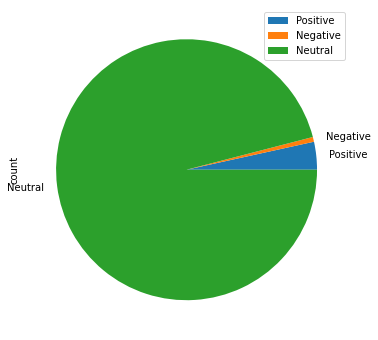

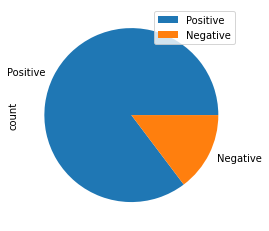

In [34]:
makePie(helpfulSnippetsTokenized)

## Sentiment in CORRECTLY Classified UNHELPFUL reviews

positive:negative ratio 2.6265060240963853

In [35]:
unhelpfulSnippets = []
for e in df_results_unhelpful[df_results_unhelpful.columns[2]]: 
    unhelpfulSnippets.append(e)
unhelpfulSnippetsTokenized = tokenizer.tokenize(''.join(unhelpfulSnippets))
sentimentDistributionCalc(unhelpfulSnippetsTokenized)

NEGATIVE: This is insane.
NEGATIVE: This is insane.
NEGATIVE: This is insane.
NEGATIVE: This is insane.
POSITIVE: I would recommend this one for ice only.If you like ice coffee, this creates it great.
POSITIVE: I would recommend this one for ice only.If you like ice coffee, this creates it great.
POSITIVE: I would recommend this one for ice only.If you like ice coffee, this creates it great.
POSITIVE: I would recommend this one for ice only.If you like ice coffee, this creates it great.
POSITIVE: Made well.
POSITIVE: Made well.
POSITIVE: Made well.
POSITIVE: Made well.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
NEGATIVE: WRONG!
NEGATIVE: WRONG!
NEGATIVE: WRONG!
NEGATIVE: WRONG!
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Oh' and so far no drainage problems.
NEGATIVE: Oh' and so far no drainage problems.
POSITIVE: It is cute.
POSITIVE: It is cute.
POSI

POSITIVE: I honestly love it!
POSITIVE: I honestly love it!
POSITIVE: I honestly love it!
POSITIVE: I honestly love it!
NEGATIVE: No fuss.
NEGATIVE: No fuss.
NEGATIVE: No fuss.
NEGATIVE: No fuss.
NEGATIVE: Disappointing.
NEGATIVE: Disappointing.
NEGATIVE: Disappointing.
NEGATIVE: Disappointing.
NEGATIVE: Terrible product.
NEGATIVE: Terrible product.
NEGATIVE: Terrible product.
NEGATIVE: Terrible product.
POSITIVE: How great is that.
POSITIVE: How great is that.
POSITIVE: How great is that.
POSITIVE: How great is that.
POSITIVE: Great gift.
POSITIVE: Great gift.
POSITIVE: Great gift.
POSITIVE: Great gift.
POSITIVE: I love these muffin top pans.
POSITIVE: I love these muffin top pans.
POSITIVE: I love these muffin top pans.
POSITIVE: I love these muffin top pans.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Yes.
POSITIVE: Does a great job and easy to use as well.
POSITIVE: Does a great job and easy to use as well.
POSITIVE: Does a great job and easy to use as well.
POSITIVE: Do

POSITIVE: I am happy I ordered it!
POSITIVE: I am happy I ordered it!
POSITIVE: I am happy I ordered it!
POSITIVE: I am happy I ordered it!
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
POSITIVE: Works great.
NEGATIVE: No oily residue.
NEGATIVE: No oily residue.
NEGATIVE: No oily residue.
NEGATIVE: No oily residue.
NEGATIVE: - no pun intended.
NEGATIVE: - no pun intended.
NEGATIVE: - no pun intended.
NEGATIVE: - no pun intended.
NEGATIVE: Grrr!
NEGATIVE: Grrr!
NEGATIVE: Grrr!
NEGATIVE: Grrr!
POSITIVE: Good luck with that.
POSITIVE: Good luck with that.
POSITIVE: Good luck with that.
POSITIVE: Good luck with that.
NEGATIVE: Too bad a negative star rating wasn't available.
NEGATIVE: Too bad a negative star rating wasn't available.
NEGATIVE: Too bad a negative star rating wasn't available.
NEGATIVE: Too bad a negative star rating wasn't available.
POSITIVE: WELL not happening.
POSITIVE: WELL not happening.
POSITIVE: WELL not happening.
POSITIVE: WELL not happening.


POSITIVE: Yes, I like it better than "good" espresso.
POSITIVE: Yes, I like it better than "good" espresso.
POSITIVE: Yes, I like it better than "good" espresso.
POSITIVE: Yes, I like it better than "good" espresso.
POSITIVE: She loves it!
POSITIVE: She loves it!
POSITIVE: She loves it!
POSITIVE: She loves it!
POSITIVE: I really wanted to love this, but am mixed.I love the greater capacity.
POSITIVE: I really wanted to love this, but am mixed.I love the greater capacity.
POSITIVE: I really wanted to love this, but am mixed.I love the greater capacity.
POSITIVE: I really wanted to love this, but am mixed.I love the greater capacity.
POSITIVE: Idiots!Dis rack is da greatest.
POSITIVE: Idiots!Dis rack is da greatest.
POSITIVE: Idiots!Dis rack is da greatest.
POSITIVE: Idiots!Dis rack is da greatest.
POSITIVE: It were easy and itch strong.
POSITIVE: It were easy and itch strong.
POSITIVE: It were easy and itch strong.
POSITIVE: It were easy and itch strong.
POSITIVE: My grandson loves Curi

POSITIVE: I am sure he will love it.
POSITIVE: I am sure he will love it.
POSITIVE: I am sure he will love it.
POSITIVE: I am sure he will love it.
POSITIVE: Could not have ordered anything better.It's a good pan and is pretty easy to clean.
POSITIVE: Could not have ordered anything better.It's a good pan and is pretty easy to clean.
POSITIVE: Could not have ordered anything better.It's a good pan and is pretty easy to clean.
POSITIVE: Could not have ordered anything better.It's a good pan and is pretty easy to clean.
NEGATIVE: It was pretty bad.
NEGATIVE: It was pretty bad.
NEGATIVE: It was pretty bad.
NEGATIVE: It was pretty bad.
POSITIVE: I have always trusted Wilton.
POSITIVE: I have always trusted Wilton.
POSITIVE: I have always trusted Wilton.
POSITIVE: I have always trusted Wilton.
NEGATIVE: ).UPDATE: The fan is dead.
NEGATIVE: ).UPDATE: The fan is dead.
NEGATIVE: ).UPDATE: The fan is dead.
NEGATIVE: ).UPDATE: The fan is dead.
POSITIVE: I love the portability.
POSITIVE: I love t

POSITIVE: It is attractive and useful.
POSITIVE: It is attractive and useful.
POSITIVE: It is attractive and useful.
POSITIVE: It is attractive and useful.
POSITIVE: Thanks for your honest and candid views.
POSITIVE: Thanks for your honest and candid views.
POSITIVE: Thanks for your honest and candid views.
POSITIVE: Thanks for your honest and candid views.
POSITIVE: We love cranking this mill.
POSITIVE: We love cranking this mill.
POSITIVE: We love cranking this mill.
POSITIVE: We love cranking this mill.
POSITIVE: What a pleasure to use.
POSITIVE: What a pleasure to use.
POSITIVE: What a pleasure to use.
POSITIVE: What a pleasure to use.
POSITIVE: A huge, hand painted gorgeous ornate mill.
POSITIVE: A huge, hand painted gorgeous ornate mill.
POSITIVE: A huge, hand painted gorgeous ornate mill.
POSITIVE: A huge, hand painted gorgeous ornate mill.
POSITIVE: Lovely.
POSITIVE: Lovely.
POSITIVE: Lovely.
POSITIVE: Lovely.
POSITIVE: Hard to believe but true.
POSITIVE: Hard to believe but tr

POSITIVE: Very useful.
POSITIVE: Very useful.
POSITIVE: Very useful.
POSITIVE: Very useful.
POSITIVE: it was great!
POSITIVE: it was great!
POSITIVE: it was great!
POSITIVE: it was great!
POSITIVE: Yes they feel soft and look great.
POSITIVE: Yes they feel soft and look great.
POSITIVE: Yes they feel soft and look great.
POSITIVE: Yes they feel soft and look great.
POSITIVE: It's all in good fun and adds to the fun nature of the product especially when giving it as a gift.
POSITIVE: It's all in good fun and adds to the fun nature of the product especially when giving it as a gift.
POSITIVE: It's all in good fun and adds to the fun nature of the product especially when giving it as a gift.
POSITIVE: It's all in good fun and adds to the fun nature of the product especially when giving it as a gift.
POSITIVE: Top stuff!
POSITIVE: Top stuff!
POSITIVE: Top stuff!
POSITIVE: Top stuff!
POSITIVE: *sample provided for honest reviewThis fit perfectly inside my Ikea duvet cover.
POSITIVE: *sample

POSITIVE: Pretty poor quality Id say.
POSITIVE: Pretty poor quality Id say.
POSITIVE: Pretty poor quality Id say.
POSITIVE: Pretty poor quality Id say.
POSITIVE: Really easy cleanup.
POSITIVE: Really easy cleanup.
POSITIVE: Really easy cleanup.
POSITIVE: Really easy cleanup.
POSITIVE: Dishwasher Safe, Bake Safe, Microwaveable.....No leaks either....
POSITIVE: Dishwasher Safe, Bake Safe, Microwaveable.....No leaks either....
POSITIVE: Dishwasher Safe, Bake Safe, Microwaveable.....No leaks either....
POSITIVE: Dishwasher Safe, Bake Safe, Microwaveable.....No leaks either....
POSITIVE: So this is great!
POSITIVE: So this is great!
POSITIVE: So this is great!
POSITIVE: So this is great!
POSITIVE: I have used a mattress pad before with great success.
POSITIVE: I have used a mattress pad before with great success.
POSITIVE: I have used a mattress pad before with great success.
POSITIVE: I have used a mattress pad before with great success.
NEGATIVE: That is just bad.
NEGATIVE: That is just b

POSITIVE: Definitely will reorder!!
POSITIVE: Definitely will reorder!!
POSITIVE: Definitely will reorder!!
POSITIVE: Definitely will reorder!!
POSITIVE: Love it!This is a nice, decently sturdy table.
POSITIVE: Love it!This is a nice, decently sturdy table.
POSITIVE: Love it!This is a nice, decently sturdy table.
POSITIVE: Love it!This is a nice, decently sturdy table.
POSITIVE: Not worth the trouble.
POSITIVE: Not worth the trouble.
POSITIVE: Not worth the trouble.
POSITIVE: Not worth the trouble.
POSITIVE: I burned my hand.
POSITIVE: I burned my hand.
POSITIVE: I burned my hand.
POSITIVE: I burned my hand.
NEGATIVE: Very inconvenient.
NEGATIVE: Very inconvenient.
NEGATIVE: Very inconvenient.
NEGATIVE: Very inconvenient.
POSITIVE: I love these dishes!!
POSITIVE: I love these dishes!!
POSITIVE: I love these dishes!!
POSITIVE: I love these dishes!!
POSITIVE: Well worth the money!
POSITIVE: Well worth the money!
POSITIVE: Well worth the money!
POSITIVE: Well worth the money!
POSITIVE: It

POSITIVE: agrees!
POSITIVE: agrees!
POSITIVE: agrees!
POSITIVE: agrees!
POSITIVE: I LOVE JOSEPH I LOVE JOSEPH!
POSITIVE: I LOVE JOSEPH I LOVE JOSEPH!
POSITIVE: I LOVE JOSEPH I LOVE JOSEPH!
POSITIVE: I LOVE JOSEPH I LOVE JOSEPH!
POSITIVE: Save your money for food better.
POSITIVE: Save your money for food better.
POSITIVE: Save your money for food better.
POSITIVE: Save your money for food better.
POSITIVE: Very easily.
POSITIVE: Very easily.
POSITIVE: Very easily.
POSITIVE: Very easily.
POSITIVE: They are SAFE which is very important.
POSITIVE: They are SAFE which is very important.
POSITIVE: They are SAFE which is very important.
POSITIVE: They are SAFE which is very important.
NEGATIVE: Inferior (cost-cutting) products.
NEGATIVE: Inferior (cost-cutting) products.
NEGATIVE: Inferior (cost-cutting) products.
NEGATIVE: Inferior (cost-cutting) products.
NEGATIVE: Too bad.
NEGATIVE: Too bad.
NEGATIVE: Too bad.
NEGATIVE: Too bad.
POSITIVE: Love the idea.
POSITIVE: Love the idea.
POSITIVE: 

NEGATIVE: Too bad.
NEGATIVE: Too bad.
NEGATIVE: Too bad.
NEGATIVE: Too bad.
POSITIVE: I love this comforter.
POSITIVE: I love this comforter.
POSITIVE: I love this comforter.
POSITIVE: I love this comforter.
NEGATIVE: I was wrong.
NEGATIVE: I was wrong.
NEGATIVE: I was wrong.
NEGATIVE: I was wrong.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: Really good buy.
POSITIVE: Really good buy.
POSITIVE: Really good buy.
POSITIVE: Really good buy.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: The mug is simple, elegant, and beautiful.
POSITIVE: I really like ozerie.
POSITIVE: I really like ozerie.
POSITIVE: I really like ozerie.
POSITIVE: I really like ozerie.
POSITIVE: This butter dish is pretty and easy to clean!
POSITIVE: This butter dish is pretty and easy to clean!
POSITIVE: This butter dish is pretty and easy to clean!
POSITIVE: This butter dish i

POSITIVE: However, this is the perfect solution!
POSITIVE: However, this is the perfect solution!
POSITIVE: However, this is the perfect solution!
POSITIVE: However, this is the perfect solution!
POSITIVE: If you are, or know a true tea lover this is the perfect gift!!!
POSITIVE: If you are, or know a true tea lover this is the perfect gift!!!
POSITIVE: If you are, or know a true tea lover this is the perfect gift!!!
POSITIVE: If you are, or know a true tea lover this is the perfect gift!!!
POSITIVE: Yes, even though it is an &#34;appliance&#34; a true tea lover will still be thrilled!!
POSITIVE: Yes, even though it is an &#34;appliance&#34; a true tea lover will still be thrilled!!
POSITIVE: Yes, even though it is an &#34;appliance&#34; a true tea lover will still be thrilled!!
POSITIVE: Yes, even though it is an &#34;appliance&#34; a true tea lover will still be thrilled!!
NEGATIVE: I am SO disappointed.
NEGATIVE: I am SO disappointed.
NEGATIVE: I am SO disappointed.
NEGATIVE: I am S

POSITIVE: Would be great it they didn't leak.
POSITIVE: Would be great it they didn't leak.
POSITIVE: Would be great it they didn't leak.
POSITIVE: Would be great it they didn't leak.
POSITIVE: Worked perfectly.
POSITIVE: Worked perfectly.
POSITIVE: Worked perfectly.
POSITIVE: Worked perfectly.
POSITIVE: They wash well.
POSITIVE: They wash well.
POSITIVE: They wash well.
POSITIVE: They wash well.
POSITIVE: Very soft, nice sheets.
POSITIVE: Very soft, nice sheets.
POSITIVE: Very soft, nice sheets.
POSITIVE: Very soft, nice sheets.
POSITIVE: Would recommend to a friend.
POSITIVE: Would recommend to a friend.
POSITIVE: Would recommend to a friend.
POSITIVE: Would recommend to a friend.
POSITIVE: Great color.
POSITIVE: Great color.
POSITIVE: Great color.
POSITIVE: Great color.
POSITIVE: Nice little stand!
POSITIVE: Nice little stand!
POSITIVE: Nice little stand!
POSITIVE: Nice little stand!
NEGATIVE: What a drag.
NEGATIVE: What a drag.
NEGATIVE: What a drag.
NEGATIVE: What a drag.
POSITIVE

POSITIVE: Clean-up is pretty easy too.
POSITIVE: Clean-up is pretty easy too.
POSITIVE: Clean-up is pretty easy too.
POSITIVE: Clean-up is pretty easy too.
POSITIVE: Very happy with it.
POSITIVE: Very happy with it.
POSITIVE: Very happy with it.
POSITIVE: Very happy with it.
POSITIVE: no thanks.
POSITIVE: no thanks.
POSITIVE: no thanks.
POSITIVE: no thanks.
NEGATIVE: sorry, OXO.
NEGATIVE: sorry, OXO.
NEGATIVE: sorry, OXO.
NEGATIVE: sorry, OXO.
POSITIVE: We're pretty darn happy with it.
POSITIVE: We're pretty darn happy with it.
POSITIVE: We're pretty darn happy with it.
POSITIVE: We're pretty darn happy with it.
NEGATIVE: wow, way to kill a franchise!
NEGATIVE: wow, way to kill a franchise!
NEGATIVE: wow, way to kill a franchise!
NEGATIVE: wow, way to kill a franchise!
Percentage positive: 3.025256730502359
Percentage negative: 1.1518179295031916
Percentage neutral: 95.82292533999444
positive:negative ratio 2.6265060240963853


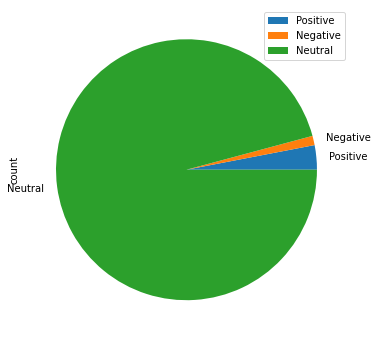

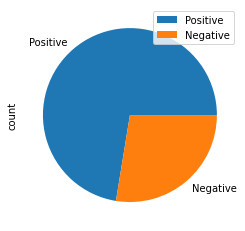

In [36]:
makePie(unhelpfulSnippetsTokenized)

## Sentiment in INCORRECTLY Classified HELPFUL reviews

positive:negative ratio 4.433333333333334

In [43]:
df_results_predicted_helpfulSnippets = []
for e in df_results_predicted_helpful[df_results_predicted_helpful.columns[2]]: 
    df_results_predicted_helpfulSnippets.append(e)
predictedhelpfulSnippetsTokenized = tokenizer.tokenize(''.join(df_results_predicted_helpfulSnippets))
sentimentDistributionCalc(predictedhelpfulSnippetsTokenized)

POSITIVE: This is a wonderful tool.
POSITIVE: This is a wonderful tool.
POSITIVE: This is a wonderful tool.
POSITIVE: This is a wonderful tool.
POSITIVE: Glad I did as these work beautifully.
POSITIVE: Glad I did as these work beautifully.
POSITIVE: Glad I did as these work beautifully.
POSITIVE: Glad I did as these work beautifully.
NEGATIVE: Otherwise, FORGET IT!
NEGATIVE: Otherwise, FORGET IT!
NEGATIVE: Otherwise, FORGET IT!
NEGATIVE: Otherwise, FORGET IT!
POSITIVE: I admire it every day.
POSITIVE: I admire it every day.
POSITIVE: I admire it every day.
POSITIVE: I admire it every day.
POSITIVE: Wow!
POSITIVE: Wow!
POSITIVE: Wow!
POSITIVE: Wow!
POSITIVE: I guarantee it.
POSITIVE: I guarantee it.
POSITIVE: I guarantee it.
POSITIVE: I guarantee it.
NEGATIVE: I hated it.
NEGATIVE: I hated it.
NEGATIVE: I hated it.
NEGATIVE: I hated it.
POSITIVE: I love it!This pillow is so awesome!
POSITIVE: I love it!This pillow is so awesome!
POSITIVE: I love it!This pillow is so awesome!
POSITIVE: I

NEGATIVE: I don't like that.
NEGATIVE: I don't like that.
NEGATIVE: I don't like that.
NEGATIVE: I don't like that.
POSITIVE: It's a very nice quality, wish I had one this nice myself!
POSITIVE: It's a very nice quality, wish I had one this nice myself!
POSITIVE: It's a very nice quality, wish I had one this nice myself!
POSITIVE: It's a very nice quality, wish I had one this nice myself!
POSITIVE: It came out perfect!
POSITIVE: It came out perfect!
POSITIVE: It came out perfect!
POSITIVE: It came out perfect!
POSITIVE: Came out perfect.
POSITIVE: Came out perfect.
POSITIVE: Came out perfect.
POSITIVE: Came out perfect.
POSITIVE: Its lightweight fibrox handle fits my smallish hand perfectly.
POSITIVE: Its lightweight fibrox handle fits my smallish hand perfectly.
POSITIVE: Its lightweight fibrox handle fits my smallish hand perfectly.
POSITIVE: Its lightweight fibrox handle fits my smallish hand perfectly.
POSITIVE: Also, they look great.
POSITIVE: Also, they look great.
POSITIVE: Also

POSITIVE: Wonderful product!
POSITIVE: Wonderful product!
POSITIVE: Wonderful product!
POSITIVE: Wonderful product!
POSITIVE: !Reasons I love about the product:1.
POSITIVE: !Reasons I love about the product:1.
POSITIVE: !Reasons I love about the product:1.
POSITIVE: !Reasons I love about the product:1.
POSITIVE: Love it.
POSITIVE: Love it.
POSITIVE: Love it.
POSITIVE: Love it.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: I also like the clear shelves.
POSITIVE: I also like the clear shelves.
POSITIVE: I also like the clear shelves.
POSITIVE: I also like the clear shelves.
NEGATIVE: ugh  I can see a huge accident happening with these.
NEGATIVE: ugh  I can see a huge accident happening with these.
NEGATIVE: ugh  I can see a huge accident happening with these.
NEGATIVE: ugh  I can see a huge accident happening with these.
POSITIVE: ha, ha!
POSITIVE: ha, ha!
POSITIVE: ha, ha!
POSITIVE: ha, ha!
NEGATIVE: Avoid 

POSITIVE: Don't bother using 'cheap' paper towels like Sparkle.
POSITIVE: Don't bother using 'cheap' paper towels like Sparkle.
POSITIVE: Don't bother using 'cheap' paper towels like Sparkle.
POSITIVE: Don't bother using 'cheap' paper towels like Sparkle.
POSITIVE: The price is excellent and it works like a charm.
POSITIVE: The price is excellent and it works like a charm.
POSITIVE: The price is excellent and it works like a charm.
POSITIVE: The price is excellent and it works like a charm.
NEGATIVE: No spout, no tipping, no problems.
NEGATIVE: No spout, no tipping, no problems.
NEGATIVE: No spout, no tipping, no problems.
NEGATIVE: No spout, no tipping, no problems.
POSITIVE: Four, definitely.
POSITIVE: Four, definitely.
POSITIVE: Four, definitely.
POSITIVE: Four, definitely.
NEGATIVE: Sorry.
NEGATIVE: Sorry.
NEGATIVE: Sorry.
NEGATIVE: Sorry.
NEGATIVE: Rice problem over.
NEGATIVE: Rice problem over.
NEGATIVE: Rice problem over.
NEGATIVE: Rice problem over.
POSITIVE: Great machine.
POS

POSITIVE: This is pretty useless.
POSITIVE: This is pretty useless.
POSITIVE: This is pretty useless.
POSITIVE: This is pretty useless.
POSITIVE: Works extremely well, & is easy to clean.I absolutely love this vacuum!
POSITIVE: Works extremely well, & is easy to clean.I absolutely love this vacuum!
POSITIVE: Works extremely well, & is easy to clean.I absolutely love this vacuum!
POSITIVE: Works extremely well, & is easy to clean.I absolutely love this vacuum!
POSITIVE: Everything works great and suction is amazing.
POSITIVE: Everything works great and suction is amazing.
POSITIVE: Everything works great and suction is amazing.
POSITIVE: Everything works great and suction is amazing.
POSITIVE: **This is the best knife set I have owned - I love it.
POSITIVE: **This is the best knife set I have owned - I love it.
POSITIVE: **This is the best knife set I have owned - I love it.
POSITIVE: **This is the best knife set I have owned - I love it.
POSITIVE: They have a good feel in the hand.
POS

NEGATIVE: So no biggie!
NEGATIVE: So no biggie!
POSITIVE: ENJOY!
POSITIVE: ENJOY!
POSITIVE: ENJOY!
POSITIVE: ENJOY!
POSITIVE: Well boxed.
POSITIVE: Well boxed.
POSITIVE: Well boxed.
POSITIVE: Well boxed.
POSITIVE: Knob seems secure.
POSITIVE: Knob seems secure.
POSITIVE: Knob seems secure.
POSITIVE: Knob seems secure.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Perfect.
POSITIVE: Love it.
POSITIVE: Love it.
POSITIVE: Love it.
POSITIVE: Love it.
NEGATIVE: Now disappointed.
NEGATIVE: Now disappointed.
NEGATIVE: Now disappointed.
NEGATIVE: Now disappointed.
NEGATIVE: Unfortunately, the blender is neither innovative nor a good value.
NEGATIVE: Unfortunately, the blender is neither innovative nor a good value.
NEGATIVE: Unfortunately, the blender is neither innovative nor a good value.
NEGATIVE: Unfortunately, the blender is neither innovative nor a good value.
POSITIVE: The quality is excellent.
POSITIVE: The quality is excellent.
POSITIVE: The quality is excellent.


POSITIVE: Truly non-stick and perfect waffles every time!
POSITIVE: Truly non-stick and perfect waffles every time!
POSITIVE: Truly non-stick and perfect waffles every time!
POSITIVE: Truly non-stick and perfect waffles every time!
POSITIVE: Sandwiches are also perfect.
POSITIVE: Sandwiches are also perfect.
POSITIVE: Sandwiches are also perfect.
POSITIVE: Sandwiches are also perfect.
NEGATIVE: I was wrong!
NEGATIVE: I was wrong!
NEGATIVE: I was wrong!
NEGATIVE: I was wrong!
POSITIVE: I love the color-coded blades.
POSITIVE: I love the color-coded blades.
POSITIVE: I love the color-coded blades.
POSITIVE: I love the color-coded blades.
POSITIVE: this culligan looked perfect.
POSITIVE: this culligan looked perfect.
POSITIVE: this culligan looked perfect.
POSITIVE: this culligan looked perfect.
POSITIVE: Easy to clean up.
POSITIVE: Easy to clean up.
POSITIVE: Easy to clean up.
POSITIVE: Easy to clean up.
POSITIVE: It is pretty, cleans up nicely and most important, cooks beautifully.
POSI

NEGATIVE: Well, big mistake.
NEGATIVE: Well, big mistake.
NEGATIVE: Well, big mistake.
NEGATIVE: Well, big mistake.
POSITIVE: I love the look of it!
POSITIVE: I love the look of it!
POSITIVE: I love the look of it!
POSITIVE: I love the look of it!
POSITIVE: Doing great!
POSITIVE: Doing great!
POSITIVE: Doing great!
POSITIVE: Doing great!
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: LOL!
POSITIVE: Was not disappointed.
POSITIVE: Was not disappointed.
POSITIVE: Was not disappointed.
POSITIVE: Was not disappointed.
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
NEGATIVE: Broke it.
NEGATIVE: Broke it.
NEGATIVE: Broke it.
NEGATIVE: Broke it.
POSITIVE: Such a cool and smart  idea.
POSITIVE: Such a cool and smart  idea.
POSITIVE: Such a cool and smart  idea.
POSITIVE: Such a cool and smart  idea.
POSITIVE: The best I have ever owned.
POSITIVE: The best I have ever owned.
POSITIVE: The best I have ever owned.
POSITIVE: The best I have ever owned.
POSITIVE

NEGATIVE: Ugh.
NEGATIVE: Ugh.
NEGATIVE: Ugh.
NEGATIVE: Ugh.
POSITIVE: Hubby calls them heaven.
POSITIVE: Hubby calls them heaven.
POSITIVE: Hubby calls them heaven.
POSITIVE: Hubby calls them heaven.
POSITIVE: I have big hands and like a well weighted strong made utensil.
POSITIVE: I have big hands and like a well weighted strong made utensil.
POSITIVE: I have big hands and like a well weighted strong made utensil.
POSITIVE: I have big hands and like a well weighted strong made utensil.
NEGATIVE: I've suffered enough.Writing this makes me sad.
NEGATIVE: I've suffered enough.Writing this makes me sad.
NEGATIVE: I've suffered enough.Writing this makes me sad.
NEGATIVE: I've suffered enough.Writing this makes me sad.
POSITIVE: Quiet strong and makes great yogurt smoothies for summer.
POSITIVE: Quiet strong and makes great yogurt smoothies for summer.
POSITIVE: Quiet strong and makes great yogurt smoothies for summer.
POSITIVE: Quiet strong and makes great yogurt smoothies for summer.
POSI

POSITIVE: Very, very nice.
POSITIVE: Very, very nice.
POSITIVE: Very, very nice.
POSITIVE: Very, very nice.
POSITIVE: Cuts pizza like a champ!
POSITIVE: Cuts pizza like a champ!
POSITIVE: Cuts pizza like a champ!
POSITIVE: Cuts pizza like a champ!
POSITIVE: It's a great buy!!
POSITIVE: It's a great buy!!
POSITIVE: It's a great buy!!
POSITIVE: It's a great buy!!
NEGATIVE: I hate it.
NEGATIVE: I hate it.
NEGATIVE: I hate it.
NEGATIVE: I hate it.
POSITIVE: Now this one looks and works like a winner.
POSITIVE: Now this one looks and works like a winner.
POSITIVE: Now this one looks and works like a winner.
POSITIVE: Now this one looks and works like a winner.
NEGATIVE: Cannot recommend.
NEGATIVE: Cannot recommend.
NEGATIVE: Cannot recommend.
NEGATIVE: Cannot recommend.
POSITIVE: I LOVE this thing!
POSITIVE: I LOVE this thing!
POSITIVE: I LOVE this thing!
POSITIVE: I LOVE this thing!
POSITIVE: It's easy, simple, and effective.
POSITIVE: It's easy, simple, and effective.
POSITIVE: It's easy,

NEGATIVE: No brainer.
NEGATIVE: No brainer.
NEGATIVE: No brainer.
NEGATIVE: No brainer.
POSITIVE: It is fantastic.
POSITIVE: It is fantastic.
POSITIVE: It is fantastic.
POSITIVE: It is fantastic.
POSITIVE: Works great!
POSITIVE: Works great!
POSITIVE: Works great!
POSITIVE: Works great!
POSITIVE: Fast, efficient, affordable and quality.I received this product and was so happily, impressed!
POSITIVE: Fast, efficient, affordable and quality.I received this product and was so happily, impressed!
POSITIVE: Fast, efficient, affordable and quality.I received this product and was so happily, impressed!
POSITIVE: Fast, efficient, affordable and quality.I received this product and was so happily, impressed!
POSITIVE: I just love this product.
POSITIVE: I just love this product.
POSITIVE: I just love this product.
POSITIVE: I just love this product.
POSITIVE: [...]Knife is excellent, does a great job.
POSITIVE: [...]Knife is excellent, does a great job.
POSITIVE: [...]Knife is excellent, does a 

NEGATIVE: I've had no problems with leaks.
NEGATIVE: I've had no problems with leaks.
NEGATIVE: I've had no problems with leaks.
NEGATIVE: I've had no problems with leaks.
POSITIVE: Works great and fits perfect.
POSITIVE: Works great and fits perfect.
POSITIVE: Works great and fits perfect.
POSITIVE: Works great and fits perfect.
POSITIVE: Very easy to install.
POSITIVE: Very easy to install.
POSITIVE: Very easy to install.
POSITIVE: Very easy to install.
POSITIVE: Highly recommended!!
POSITIVE: Highly recommended!!
POSITIVE: Highly recommended!!
POSITIVE: Highly recommended!!
POSITIVE: The size is awesome.
POSITIVE: The size is awesome.
POSITIVE: The size is awesome.
POSITIVE: The size is awesome.
POSITIVE: The colors are great.
POSITIVE: The colors are great.
POSITIVE: The colors are great.
POSITIVE: The colors are great.
POSITIVE: I love the flip up straws...
POSITIVE: I love the flip up straws...
POSITIVE: I love the flip up straws...
POSITIVE: I love the flip up straws...
NEGATIVE

POSITIVE: Work like a charm.
POSITIVE: Work like a charm.
POSITIVE: Work like a charm.
POSITIVE: Work like a charm.
POSITIVE: It's an excellent iron.
POSITIVE: It's an excellent iron.
POSITIVE: It's an excellent iron.
POSITIVE: It's an excellent iron.
POSITIVE: But it cuts beautifully!
POSITIVE: But it cuts beautifully!
POSITIVE: But it cuts beautifully!
POSITIVE: But it cuts beautifully!
POSITIVE: The suction is FANTASTIC!
POSITIVE: The suction is FANTASTIC!
POSITIVE: The suction is FANTASTIC!
POSITIVE: The suction is FANTASTIC!
POSITIVE: For this purpose, they're great.
POSITIVE: For this purpose, they're great.
POSITIVE: For this purpose, they're great.
POSITIVE: For this purpose, they're great.
POSITIVE: Perfection!
POSITIVE: Perfection!
POSITIVE: Perfection!
POSITIVE: Perfection!
NEGATIVE: It's scary.
NEGATIVE: It's scary.
NEGATIVE: It's scary.
NEGATIVE: It's scary.
POSITIVE: Easy to clean, as it swivels outward.
POSITIVE: Easy to clean, as it swivels outward.
POSITIVE: Easy to cl

POSITIVE: Very nice, good and sturdy.
POSITIVE: Very nice, good and sturdy.
POSITIVE: Very nice, good and sturdy.
POSITIVE: Very nice, good and sturdy.
POSITIVE: It performs wonderfully.
POSITIVE: It performs wonderfully.
POSITIVE: It performs wonderfully.
POSITIVE: It performs wonderfully.
POSITIVE: It doesn't leak.
POSITIVE: It doesn't leak.
POSITIVE: It doesn't leak.
POSITIVE: It doesn't leak.
NEGATIVE: Perhaps the problem lies more my country.
NEGATIVE: Perhaps the problem lies more my country.
NEGATIVE: Perhaps the problem lies more my country.
NEGATIVE: Perhaps the problem lies more my country.
POSITIVE: Nice solid bowls.
POSITIVE: Nice solid bowls.
POSITIVE: Nice solid bowls.
POSITIVE: Nice solid bowls.
POSITIVE: Thank you.
POSITIVE: Thank you.
POSITIVE: Thank you.
POSITIVE: Thank you.
POSITIVE: I like my coffee very strong and this makes the perfect cup.
POSITIVE: I like my coffee very strong and this makes the perfect cup.
POSITIVE: I like my coffee very strong and this makes 

POSITIVE: I just find them really pretty and elegant.
POSITIVE: I just find them really pretty and elegant.
POSITIVE: I just find them really pretty and elegant.
POSITIVE: I just find them really pretty and elegant.
NEGATIVE: I am disappointed.
NEGATIVE: I am disappointed.
NEGATIVE: I am disappointed.
NEGATIVE: I am disappointed.
POSITIVE: Clear top design gives it a nice modern look.
POSITIVE: Clear top design gives it a nice modern look.
POSITIVE: Clear top design gives it a nice modern look.
POSITIVE: Clear top design gives it a nice modern look.
POSITIVE: A great unit.This shower curtain is nicer than I expected.
POSITIVE: A great unit.This shower curtain is nicer than I expected.
POSITIVE: A great unit.This shower curtain is nicer than I expected.
POSITIVE: A great unit.This shower curtain is nicer than I expected.
POSITIVE: Good value compared to other stores.
POSITIVE: Good value compared to other stores.
POSITIVE: Good value compared to other stores.
POSITIVE: Good value compar

POSITIVE: Very easy to assemble.
POSITIVE: Very easy to assemble.
POSITIVE: Very easy to assemble.
POSITIVE: Very easy to assemble.
POSITIVE: You make a great microwave oven.
POSITIVE: You make a great microwave oven.
POSITIVE: You make a great microwave oven.
POSITIVE: You make a great microwave oven.
POSITIVE: I like the size... which is pretty big.
POSITIVE: I like the size... which is pretty big.
POSITIVE: I like the size... which is pretty big.
POSITIVE: I like the size... which is pretty big.
POSITIVE: Great materials and weight.
POSITIVE: Great materials and weight.
POSITIVE: Great materials and weight.
POSITIVE: Great materials and weight.
POSITIVE: Nice finish.
POSITIVE: Nice finish.
POSITIVE: Nice finish.
POSITIVE: Nice finish.
POSITIVE: It definitely is a great value for the price!!
POSITIVE: It definitely is a great value for the price!!
POSITIVE: It definitely is a great value for the price!!
POSITIVE: It definitely is a great value for the price!!
POSITIVE: !These are gre

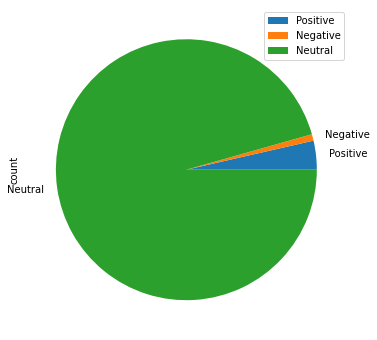

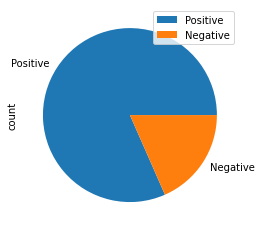

In [44]:
makePie(predictedhelpfulSnippetsTokenized)

## Sentiment in INCORRECTLY Classified UNHELPFUL reviews

positive:negative ratio 3.6815286624203822

In [41]:
df_results_predicted_unhelpfulSnippets = []
for e in df_results_predicted_unhelpful[df_results_predicted_unhelpful.columns[2]]: 
    df_results_predicted_unhelpfulSnippets.append(e)
predictedunhelpfulSnippetsTokenized = tokenizer.tokenize(''.join(df_results_predicted_unhelpfulSnippets))
sentimentDistributionCalc(predictedunhelpfulSnippetsTokenized)

POSITIVE: I bought this as a gift for a friend.
POSITIVE: I bought this as a gift for a friend.
POSITIVE: I bought this as a gift for a friend.
POSITIVE: I bought this as a gift for a friend.
NEGATIVE: No odor.
NEGATIVE: No odor.
NEGATIVE: No odor.
NEGATIVE: No odor.
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: Love it!
POSITIVE: I love it.. Easy to clean off and doesn't leave coffee stains like my counter top doesI purchased this item....
POSITIVE: I love it.. Easy to clean off and doesn't leave coffee stains like my counter top doesI purchased this item....
POSITIVE: I love it.. Easy to clean off and doesn't leave coffee stains like my counter top doesI purchased this item....
POSITIVE: I love it.. Easy to clean off and doesn't leave coffee stains like my counter top doesI purchased this item....
POSITIVE: I love the froth...
POSITIVE: I love the froth...
POSITIVE: I love the froth...
POSITIVE: I love the froth...
NEGATIVE: Shame on Oneida.
NEGATIVE: Shame on On

POSITIVE: Luckily the mugs weren't broken.
POSITIVE: Luckily the mugs weren't broken.
POSITIVE: Luckily the mugs weren't broken.
POSITIVE: Luckily the mugs weren't broken.
NEGATIVE: Packed VERY well so no breakage.
NEGATIVE: Packed VERY well so no breakage.
NEGATIVE: Packed VERY well so no breakage.
NEGATIVE: Packed VERY well so no breakage.
POSITIVE: We LOVE it.
POSITIVE: We LOVE it.
POSITIVE: We LOVE it.
POSITIVE: We LOVE it.
POSITIVE: Easy clean up.
POSITIVE: Easy clean up.
POSITIVE: Easy clean up.
POSITIVE: Easy clean up.
POSITIVE: Totally awesome!
POSITIVE: Totally awesome!
POSITIVE: Totally awesome!
POSITIVE: Totally awesome!
POSITIVE: We tested this awesome fun and love it!
POSITIVE: We tested this awesome fun and love it!
POSITIVE: We tested this awesome fun and love it!
POSITIVE: We tested this awesome fun and love it!
POSITIVE: I LOVE this blender.
POSITIVE: I LOVE this blender.
POSITIVE: I LOVE this blender.
POSITIVE: I LOVE this blender.
POSITIVE: They are truly delicate an

POSITIVE: Covered king well.
POSITIVE: Covered king well.
POSITIVE: Covered king well.
POSITIVE: It is a beautiful thing.
POSITIVE: It is a beautiful thing.
POSITIVE: It is a beautiful thing.
POSITIVE: It is a beautiful thing.
POSITIVE: Liked the first so well I bought another.
POSITIVE: Liked the first so well I bought another.
POSITIVE: Liked the first so well I bought another.
POSITIVE: Liked the first so well I bought another.
POSITIVE: Loved it.
POSITIVE: Loved it.
POSITIVE: Loved it.
POSITIVE: Loved it.
NEGATIVE: Till it died.
NEGATIVE: Till it died.
NEGATIVE: Till it died.
NEGATIVE: Till it died.
POSITIVE: Great service!
POSITIVE: Great service!
POSITIVE: Great service!
POSITIVE: Great service!
POSITIVE: Gave it another star!Works great.
POSITIVE: Gave it another star!Works great.
POSITIVE: Gave it another star!Works great.
POSITIVE: Gave it another star!Works great.
POSITIVE: Not bad by any means, but was hoping for better.
POSITIVE: Not bad by any means, but was hoping for bet

POSITIVE: I LOVE it!
POSITIVE: I LOVE it!
POSITIVE: I LOVE it!
POSITIVE: I absolutely love it!
POSITIVE: I absolutely love it!
POSITIVE: I absolutely love it!
POSITIVE: I absolutely love it!
NEGATIVE: Seriously.
NEGATIVE: Seriously.
NEGATIVE: Seriously.
NEGATIVE: Seriously.
POSITIVE: We really love this Keurig.You have to love Corelle.
POSITIVE: We really love this Keurig.You have to love Corelle.
POSITIVE: We really love this Keurig.You have to love Corelle.
POSITIVE: We really love this Keurig.You have to love Corelle.
POSITIVE: Good thing I received this product free of charge.
POSITIVE: Good thing I received this product free of charge.
POSITIVE: Good thing I received this product free of charge.
POSITIVE: Good thing I received this product free of charge.
POSITIVE: That is a dream come true.
POSITIVE: That is a dream come true.
POSITIVE: That is a dream come true.
POSITIVE: That is a dream come true.
NEGATIVE: What's wrong with vinegar?
NEGATIVE: What's wrong with vinegar?
NEGATIV

NEGATIVE: Great idea, but worthless product.
NEGATIVE: Great idea, but worthless product.
NEGATIVE: Great idea, but worthless product.
NEGATIVE: Great idea, but worthless product.
NEGATIVE: No fuss, no muss.
NEGATIVE: No fuss, no muss.
NEGATIVE: No fuss, no muss.
NEGATIVE: No fuss, no muss.
NEGATIVE: The problem is a poor design.
NEGATIVE: The problem is a poor design.
NEGATIVE: The problem is a poor design.
NEGATIVE: The problem is a poor design.
POSITIVE: Clean up is very easy.
POSITIVE: Clean up is very easy.
POSITIVE: Clean up is very easy.
POSITIVE: Clean up is very easy.
NEGATIVE: Not a good idea.
NEGATIVE: Not a good idea.
NEGATIVE: Not a good idea.
NEGATIVE: Not a good idea.
POSITIVE: It is so beautiful.
POSITIVE: It is so beautiful.
POSITIVE: It is so beautiful.
POSITIVE: It is so beautiful.
POSITIVE: This works pretty well.
POSITIVE: This works pretty well.
POSITIVE: This works pretty well.
POSITIVE: This works pretty well.
POSITIVE: So far, so good.
POSITIVE: So far, so good

POSITIVE: they work great.
POSITIVE: they work great.
POSITIVE: they work great.
POSITIVE: they work great.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I love them.
NEGATIVE: This is very disappointing.
NEGATIVE: This is very disappointing.
NEGATIVE: This is very disappointing.
NEGATIVE: This is very disappointing.
POSITIVE: Good price, looks great.
POSITIVE: Good price, looks great.
POSITIVE: Good price, looks great.
POSITIVE: Good price, looks great.
POSITIVE: Very clever.
POSITIVE: Very clever.
POSITIVE: Very clever.
POSITIVE: Very clever.
NEGATIVE: Then it died.
NEGATIVE: Then it died.
NEGATIVE: Then it died.
NEGATIVE: Then it died.
POSITIVE: they're thin, lightweight, super sharp, and super sturdy.
POSITIVE: they're thin, lightweight, super sharp, and super sturdy.
POSITIVE: they're thin, lightweight, super sharp, and super sturdy.
POSITIVE: they're thin, lightweight, super sharp, and super sturdy.
NEGATIVE: Bad, Bad product.
NEGATIVE: Bad, Bad p

POSITIVE: I really love them.
POSITIVE: I really love them.
POSITIVE: I really love them.
POSITIVE: I really love them.
POSITIVE: They are stunning and are great quality.
POSITIVE: They are stunning and are great quality.
POSITIVE: They are stunning and are great quality.
POSITIVE: They are stunning and are great quality.
POSITIVE: Works well too.
POSITIVE: Works well too.
POSITIVE: Works well too.
POSITIVE: Works well too.
POSITIVE: It really makes a good smoothie.I love it!!
POSITIVE: It really makes a good smoothie.I love it!!
POSITIVE: It really makes a good smoothie.I love it!!
POSITIVE: It really makes a good smoothie.I love it!!
POSITIVE: Great pricing, too.
POSITIVE: Great pricing, too.
POSITIVE: Great pricing, too.
POSITIVE: Great pricing, too.
NEGATIVE: Big disappointment.
NEGATIVE: Big disappointment.
NEGATIVE: Big disappointment.
NEGATIVE: Big disappointment.
POSITIVE: They are great.
POSITIVE: They are great.
POSITIVE: They are great.
POSITIVE: They are great.
NEGATIVE: We

POSITIVE: Amazon did a very good job.
POSITIVE: Amazon did a very good job.
POSITIVE: Amazon did a very good job.
POSITIVE: Amazon did a very good job.
POSITIVE: It's good enough, I promise.These are very nice and well insulated.
POSITIVE: It's good enough, I promise.These are very nice and well insulated.
POSITIVE: It's good enough, I promise.These are very nice and well insulated.
POSITIVE: It's good enough, I promise.These are very nice and well insulated.
NEGATIVE: I am extremely disappointed.
NEGATIVE: I am extremely disappointed.
NEGATIVE: I am extremely disappointed.
NEGATIVE: I am extremely disappointed.
POSITIVE: Turns easily, attractive, lightweight.
POSITIVE: Turns easily, attractive, lightweight.
POSITIVE: Turns easily, attractive, lightweight.
POSITIVE: Turns easily, attractive, lightweight.
NEGATIVE: It is actually dangerous.
NEGATIVE: It is actually dangerous.
NEGATIVE: It is actually dangerous.
NEGATIVE: It is actually dangerous.
NEGATIVE: What a waste, so sad.
NEGATIVE

NEGATIVE: I'm disappointed.
NEGATIVE: I'm disappointed.
NEGATIVE: I'm disappointed.
NEGATIVE: I'm disappointed.
POSITIVE: Colors are beautiful.
POSITIVE: Colors are beautiful.
POSITIVE: Colors are beautiful.
POSITIVE: Colors are beautiful.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Very good quality.
POSITIVE: Quality of manufacture is pretty good.
POSITIVE: Quality of manufacture is pretty good.
POSITIVE: Quality of manufacture is pretty good.
POSITIVE: Quality of manufacture is pretty good.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I love them.
POSITIVE: I'm a fan.
POSITIVE: I'm a fan.
POSITIVE: I'm a fan.
POSITIVE: I'm a fan.
POSITIVE: I am now able to enjoy a good night's sleep.
POSITIVE: I am now able to enjoy a good night's sleep.
POSITIVE: I am now able to enjoy a good night's sleep.
POSITIVE: I am now able to enjoy a good night's sleep.
POSITIVE: They made THE best toast!
POSITIVE: They m

NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
NEGATIVE: No.
POSITIVE: It's probably great for businesses.
POSITIVE: It's probably great for businesses.
POSITIVE: It's probably great for businesses.
POSITIVE: It's probably great for businesses.
POSITIVE: Washes nicely, works, nice size.
POSITIVE: Washes nicely, works, nice size.
POSITIVE: Washes nicely, works, nice size.
POSITIVE: Washes nicely, works, nice size.
NEGATIVE: No negatives here.
NEGATIVE: No negatives here.
NEGATIVE: No negatives here.
NEGATIVE: No negatives here.
NEGATIVE: A real PITA.
NEGATIVE: A real PITA.
NEGATIVE: A real PITA.
NEGATIVE: A real PITA.
POSITIVE: The handles are perfectly designed for easy carrying.
POSITIVE: The handles are perfectly designed for easy carrying.
POSITIVE: The handles are perfectly designed for easy carrying.
POSITIVE: The handles are perfectly designed for easy carrying.
POSITIVE: Great dealBought it because of the good ratings.
POSITIVE: Great dealBought it because of the good ratings.
POSITI

POSITIVE: It's really cute, got a NICE nonstick inner pot and easy to use.
POSITIVE: It's really cute, got a NICE nonstick inner pot and easy to use.
POSITIVE: It's really cute, got a NICE nonstick inner pot and easy to use.
POSITIVE: It's really cute, got a NICE nonstick inner pot and easy to use.
POSITIVE: I love this pan!
POSITIVE: I love this pan!
POSITIVE: I love this pan!
POSITIVE: I love this pan!
NEGATIVE: The problem?
NEGATIVE: The problem?
NEGATIVE: The problem?
NEGATIVE: The problem?
POSITIVE: It's very useful.
POSITIVE: It's very useful.
POSITIVE: It's very useful.
POSITIVE: It's very useful.
POSITIVE: There are definitely better choices in Victorinox.
POSITIVE: There are definitely better choices in Victorinox.
POSITIVE: There are definitely better choices in Victorinox.
POSITIVE: There are definitely better choices in Victorinox.
POSITIVE: I could only wish that it fit inside a frame better.
POSITIVE: I could only wish that it fit inside a frame better.
POSITIVE: I could 

NEGATIVE: Their knives were terrible.
NEGATIVE: Their knives were terrible.
NEGATIVE: Their knives were terrible.
NEGATIVE: Their knives were terrible.
POSITIVE: Air = Insulation.this cutter works great!
POSITIVE: Air = Insulation.this cutter works great!
POSITIVE: Air = Insulation.this cutter works great!
POSITIVE: Air = Insulation.this cutter works great!
POSITIVE: My guests love it as well.
POSITIVE: My guests love it as well.
POSITIVE: My guests love it as well.
POSITIVE: My guests love it as well.
POSITIVE: I like it very much.I love these.
POSITIVE: I like it very much.I love these.
POSITIVE: I like it very much.I love these.
POSITIVE: I like it very much.I love these.
POSITIVE: It wipes clean.
POSITIVE: It wipes clean.
POSITIVE: It wipes clean.
POSITIVE: It wipes clean.
POSITIVE: Easy to clean.
POSITIVE: Easy to clean.
POSITIVE: Easy to clean.
POSITIVE: Easy to clean.
POSITIVE: Nice color.
POSITIVE: Nice color.
POSITIVE: Nice color.
POSITIVE: Nice color.
POSITIVE: I love that th

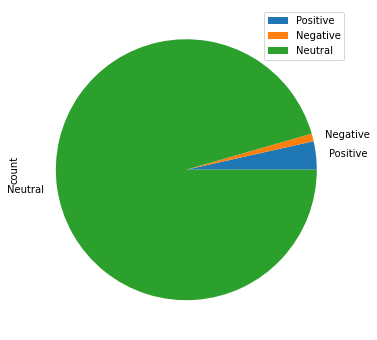

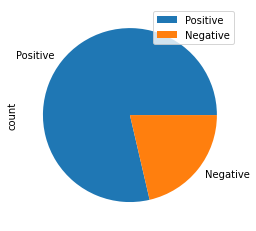

In [42]:
makePie(predictedunhelpfulSnippetsTokenized)